3. Phân tích tiêu thụ nhiên liệu

Dataset: https://archive.ics.uci.edu/dataset/9/auto+mpg

Input: trọng lượng xe

Output: mức tiêu thụ nhiên liệu

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from ucimlrepo import fetch_ucirepo 


In [39]:
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9)
print(auto_mpg)

{'data': {'ids':                       car_name
0    chevrolet,chevelle,malibu
1            buick,skylark,320
2           plymouth,satellite
3                amc,rebel,sst
4                  ford,torino
..                         ...
393            ford,mustang,gl
394                  vw,pickup
395              dodge,rampage
396                ford,ranger
397                 chevy,s-10

[398 rows x 1 columns], 'features':      displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4

In [55]:
features = auto_mpg.data.features  # Dữ liệu đầu vào
targets = auto_mpg.data.targets  # Giá trị mục tiêu (mpg)
data = pd.merge(features, targets)
data

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

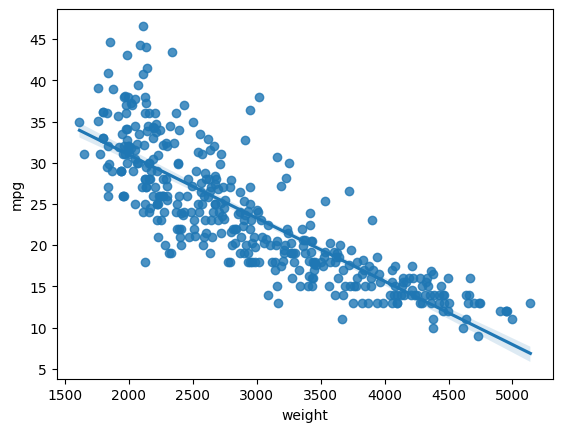

In [44]:
sns.regplot(x=X,y=y)
plt.show()

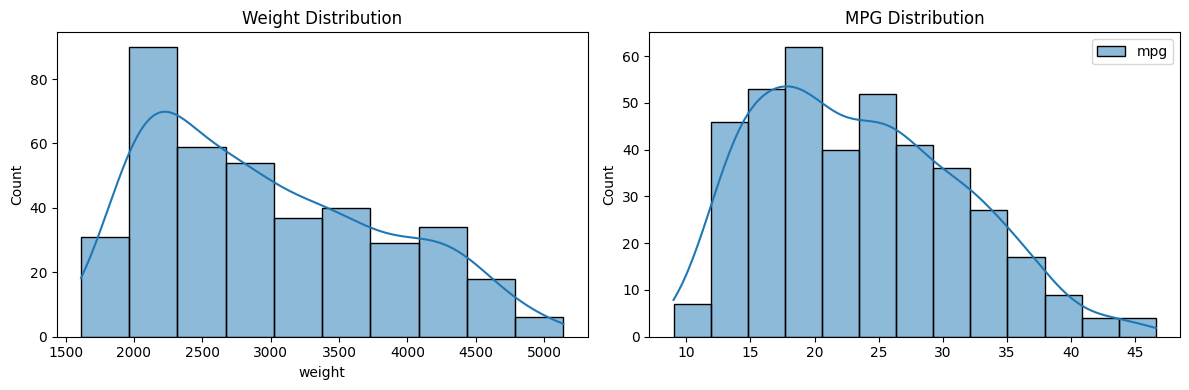

In [46]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.histplot(X, kde= True)
plt.title("Weight Distribution")

plt.subplot(122)
sns.histplot(y, kde= True)
plt.title("MPG Distribution")

plt.tight_layout()
plt.show()


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train,y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [8]:
y_pred = model.predict(X_test)

print(f"Kết quả mô hình:")
print(f"R2 Score: {r2_score(y_test,y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test,y_pred, squared= False):.4f}")

Kết quả mô hình:
R2 Score: 0.2548
RMSE: 10.0693


c:\Users\duclp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


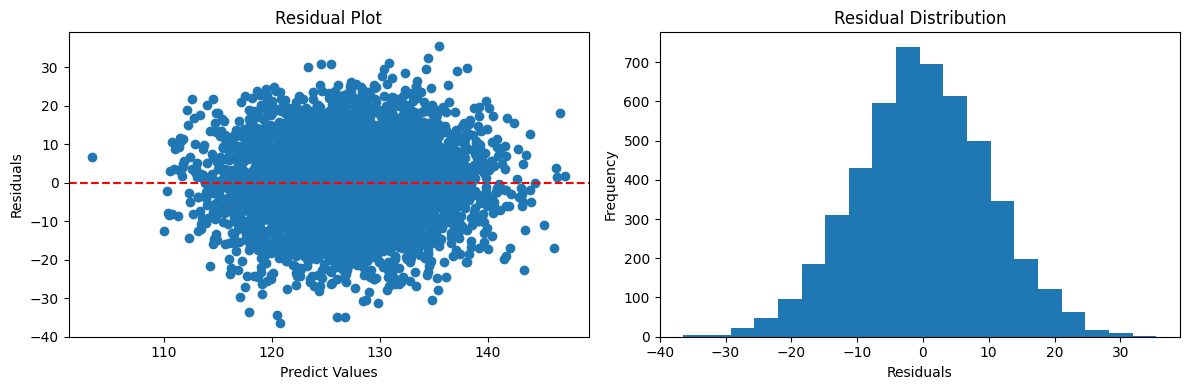

In [9]:
# Trực quan hóa lên kết quả 
residuals = y_test - y_pred

plt.figure(figsize=(12,4))
# Residual plot
plt.subplot(121)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predict Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#Histogram
plt.subplot(122)
plt.hist(residuals, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()